## Importing the necessary library

In [22]:
!pip install --upgrade tensorflow-hub

In [85]:
conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0


Note: you may need to restart the kernel to use updated packages.Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.




Could not load conda plugin `anaconda-cloud-auth`:

cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (C:\Users\aksha\anaconda3\lib\site-packages\conda\plugins\types.py)


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0




In [23]:
!pip install "tensorflow>=2.0.0"


In [24]:
! pip install numpy~=1.20
import tensorflow as tf

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
%matplotlib inline
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
import tensorflow_hub as hub
import keras.utils as image
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report


In [26]:
!pip install opencv-python

## Directory assignment

In [27]:
train_dir = "train"
test_dir = "test"


## Reading the first image

In [28]:
image = cv2.imread(r"train/1.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB

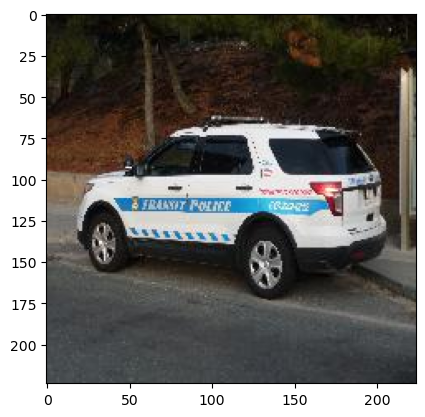

In [29]:
plt.imshow(image)

In [30]:
image.shape # This shows the shape of the image (length, width,chanel)

(224, 224, 3)

## Preprocessing

For preprocessing, the ImageDataGenerator is used. It is used for the generation of batches containing the data of tensor images and is
used in the domain of real-time data augmentation.


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Keras image data generator is used for the generation

In [32]:
image_gen = ImageDataGenerator(
            rotation_range=20,# specifies the rotation to be 20%
            width_shift_range=0.1, # specifies the width shift of 10%
            height_shift_range=0.1,# specifies the height shift of 10%
            shear_range=0.20, # crops part of the image
            zoom_range=0.20, # #zooms the image by 20%
            fill_mode='nearest', # fills using the nearest pixel
            horizontal_flip=True, # Specifies the horizontal flip
            rescale=1/255 # scales the image
)


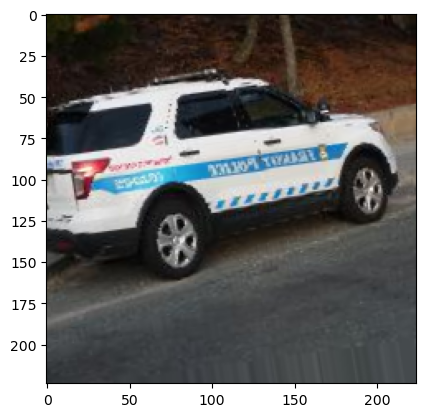

In [33]:
plt.imshow(image_gen.random_transform(image))

In [34]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [35]:
test_df

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg
...,...
701,674.jpg
702,1027.jpg
703,447.jpg
704,2176.jpg


In [36]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [37]:
if 'emergency_or_not' in train_df.columns:
    train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)

if 'emergency_or_not' in test_df.columns:
    test_df['emergency_or_not'] = test_df['emergency_or_not'].astype(str)


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [39]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for training
 directory=train_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 y_col='emergency_or_not', # specifies the class labels
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=50 # defines the batch size
 )
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for tr
 directory=train_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 y_col='emergency_or_not', # specifies the class labels
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=50 # defines the batch size
 ) 


Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


## Constructor stage

In [40]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

C:\Users\aksha\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Compilation stage


In [41]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 110, 110, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 53, 53, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │     1,081,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,101,221 (4.20 MB)

 Trainable params: 1,101,157 (4.20 MB)

 Non-trainable params: 64 (256.00 B)

## Training stage

In [43]:
history=model.fit(train_generator,epochs = 15,validation_data = validation_generator)

Epoch 1/15


C:\Users\aksha\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 875ms/step - accuracy: 0.5926 - loss: 0.9883 - val_accuracy: 0.6149 - val_loss: 0.6521
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 772ms/step - accuracy: 0.6906 - loss: 0.6180 - val_accuracy: 0.6169 - val_loss: 0.6596
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 763ms/step - accuracy: 0.7316 - loss: 0.5923 - val_accuracy: 0.6089 - val_loss: 0.6479
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 813ms/step - accuracy: 0.7426 - loss: 0.5426 - val_accuracy: 0.7722 - val_loss: 0.6458
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 874ms/step - accuracy: 0.7934 - loss: 0.4621 - val_accuracy: 0.6391 - val_loss: 0.6376
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 814ms/step - accuracy: 0.7729 - loss: 0.5035 - val_accuracy: 0.6230 - val_loss: 0.6353
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 829ms/step - accuracy: 0.8083 - loss: 0.4414 - val_accuracy: 0.7117 - val_loss: 0.6567
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 799ms/step - accuracy: 0.7922 - loss: 0.4590 - val_accuracy: 0.639

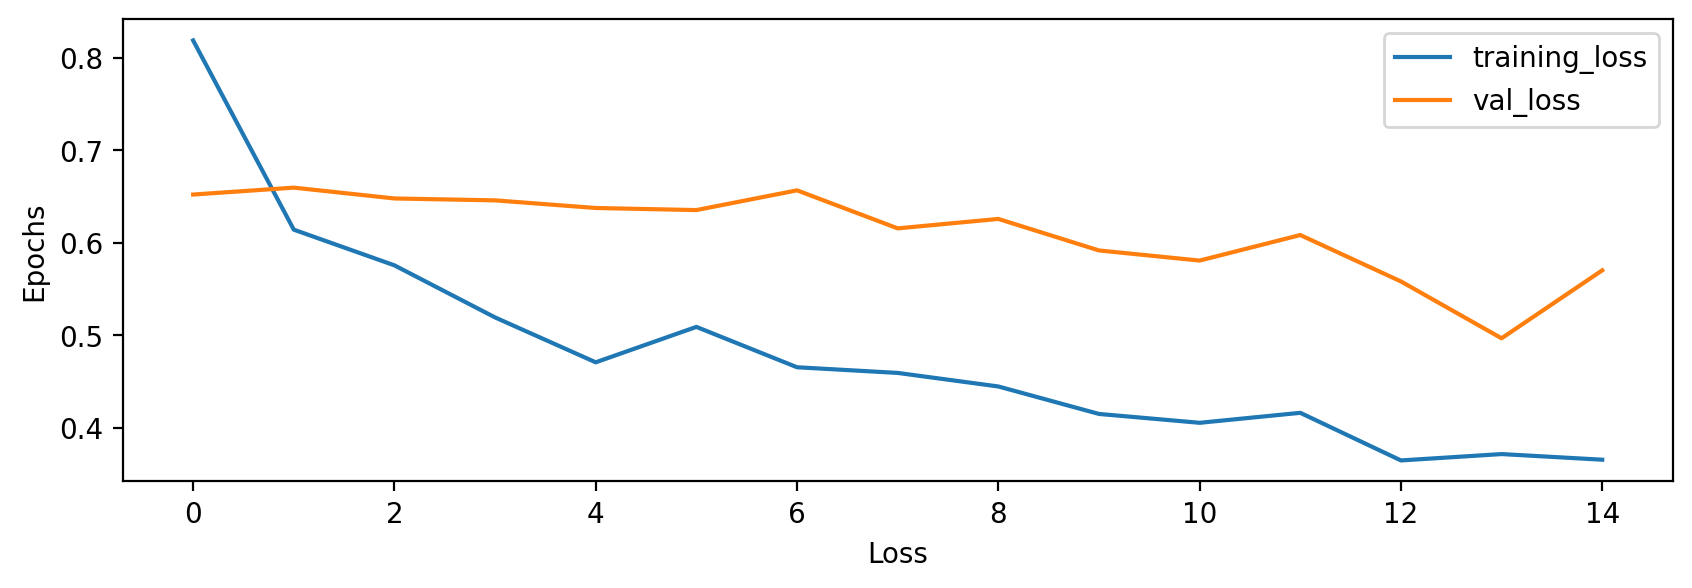

In [44]:
## checking for overfitting
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df['loss'],
 label='training_loss')
plt.plot(history_df['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

## Evaluation stage

In [45]:
test_df.index

RangeIndex(start=0, stop=706, step=1)

In [46]:
test_dir_image = []
for i in tqdm(test_df.index):
    img_path = 'test/' + test_df['image_names'][i]  # Adjust the path to match the directory structure
    img = Image.open(img_path).convert('RGB')  # Load image using PIL
    img = img.resize((224, 224))  # Resize image
    img = np.array(img)  # Convert image to NumPy array
#     img = img / 255.0  # Normalize pixel values
    test_dir_image.append(img)

test = np.array(test_dir_image)


100%|██████████| 706/706 [00:05<00:00, 118.45it/s]


In [47]:
pred = model.predict(test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step


In [48]:
num_ = np.floor(pred)

In [49]:
submission = pd.read_csv('sample_submission.csv')
submission['emergency_or_not'] = num_

In [50]:
submission.to_csv('submission29.csv', index = False)

In [82]:
img_path = 'ambulance 1.jpeg'  # Adjust the path to match the directory structure
img = Image.open(img_path).convert('RGB')  # Load image using PIL
img = img.resize((224, 224))  # Resize image
img = np.array(img)  # Convert image to NumPy array
#     img = img / 255.0  # Normalize pixel values
l=[img]

test = np.array(l)

In [83]:
pred = model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [84]:
print(np.floor(pred))

[[1.]]


In [76]:
submission.head(5)

,image_names,emergency_or_not
0,1960.jpg,0.0
1,668.jpg,1.0
2,2082.jpg,0.0
3,808.jpg,1.0
4,1907.jpg,0.0


In [34]:
pip install --upgrade tensorflow tensorflow-hub


In [72]:
!pip install h5py
#import h5py as h5
import h5py


ImportError: DLL load failed while importing _errors: The specified procedure could not be found.

In [68]:
from tensorflow.keras.models import load_model
model.save('vehicle.keras')
model_vechile = load_model(('vehicle.keras'),custom_objects={'KerasLayer':hub.KerasLayer})

ImportError: h5py must be installed in order to save a model.

In [69]:
ff=cv2.imread("File_005_1618478020836_1618478037129.webp")

In [70]:
fff=np.array(ff)

In [67]:
img_path = 'tt.jpeg'  # Adjust the path to match the directory structure
img = Image.open(img_path).convert('RGB')  # Load image using PIL
img = img.resize((224, 224))  # Resize image
img = np.array(img)  # Convert image to NumPy array
#     img = img / 255.0  # Normalize pixel values
test_dir_image.append(img)

test = np.array(test_dir_image)

In [74]:
f=model_vechile.predict(test)

NameError: name 'model_vechile' is not defined

In [ ]:
print(f)